In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
data = data.rename(columns={'v1': 'type','v2': 'message'})

In [7]:
data

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
data.isnull().any()

type       False
message    False
dtype: bool

In [9]:
data["type"].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
data.groupby('type').describe()

message                                                               
       count unique                                                top freq
type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [11]:
data['charlen'] = data['message'].str.len();

In [12]:
data.groupby('type').describe()

charlen                                                         
       count        mean        std   min    25%    50%    75%    max
type                                                                 
ham   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [13]:
data["sentence"]=data["message"].apply(nltk.sent_tokenize)


In [14]:
data['sentlen'] = data['sentence'].apply(len)

In [15]:
data["words"]=data["message"].apply(nltk.word_tokenize)

In [16]:
data['wordlen'] = data['words'].apply(len)

In [17]:
data

,type,message,charlen,sentence,sentlen,words,wordlen
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go until jurong point, crazy.., Available onl...",2,"[Go, until, jurong, point, ,, crazy.., Availab...",23
1,ham,Ok lar... Joking wif u oni...,29,"[Ok lar..., Joking wif u oni...]",2,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,[Free entry in 2 a wkly comp to win FA Cup fin...,2,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,ham,U dun say so early hor... U c already then say...,49,[U dun say so early hor... U c already then sa...,1,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah I don't think he goes to usf, he lives ar...",1,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,[FreeMsg Hey there darling it's been 3 week's ...,4,"[FreeMsg, Hey, there, darling, it, 's, been, 3...",39
6,ham,Even my brother is not like to speak with me. ...,77,[Even my brother is not like to speak with me....,2,"[Even, my, brother, is, not, like, to, speak, ...",18
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,[As per your request 'Melle Melle (Oru Minnami...,2,"[As, per, your, request, 'Melle, Melle, (, Oru...",30
8,spam,WINNER!! As a valued network customer you have...,158,"[WINNER!!, As a valued network customer you ha...",5,"[WINNER, !, !, As, a, valued, network, custome...",32
9,spam,Had your mobile 11 months or more? U R entitle...,154,"[Had your mobile 11 months or more?, U R entit...",3,"[Had, your, mobile, 11, months, or, more, ?, U...",31


In [18]:
data.groupby('type').describe()

charlen                                                          sentlen  \
       count        mean        std   min    25%    50%    75%    max   count   
type                                                                            
ham   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0  4825.0   
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0   747.0   

                ...              wordlen                                   \
          mean  ...    75%   max   count       mean        std  min   25%   
type            ...                                                         
ham   1.832332  ...    2.0  38.0  4825.0  17.076891  13.876308  1.0   8.0   
spam  3.020080  ...    4.0   9.0   747.0  27.706827   6.768560  2.0  25.0   

                         
       50%   75%    max  
type                     
ham   13.0  22.0  219.0  
spam  29.0  32.0   44.0  

[2 rows x 24 columns]

In [19]:
x=data.groupby('type')

In [20]:
list(x)

[('ham',
       type                                            message  charlen  \
  0     ham  Go until jurong point, crazy.. Available only ...      111   
  1     ham                      Ok lar... Joking wif u oni...       29   
  3     ham  U dun say so early hor... U c already then say...       49   
  4     ham  Nah I don't think he goes to usf, he lives aro...       61   
  6     ham  Even my brother is not like to speak with me. ...       77   
  7     ham  As per your request 'Melle Melle (Oru Minnamin...      160   
  10    ham  I'm gonna be home soon and i don't want to tal...      109   
  13    ham  I've been searching for the right words to tha...      196   
  14    ham                I HAVE A DATE ON SUNDAY WITH WILL!!       35   
  16    ham                         Oh k...i'm watching here:)       26   
  17    ham  Eh u remember how 2 spell his name... Yes i di...       81   
  18    ham  Fine if thatåÕs the way u feel. ThatåÕs the wa...       58   
  20    ham     

(array([0, 1]), <a list of 2 Text xticklabel objects>)

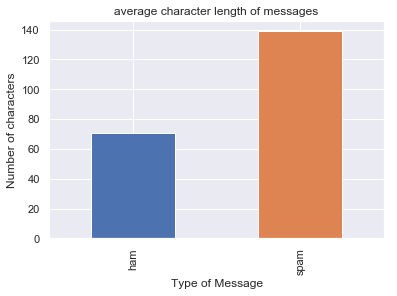

In [26]:
sns.set()
x=data.groupby("type")["charlen"].mean()
cx=x.plot.bar(title='average character length of messages')
cx.set_xlabel("Type of Message")
cx.set_ylabel("Number of characters")
plt.xticks(rotation=90)

Text(0, 0.5, 'Number of sentences')

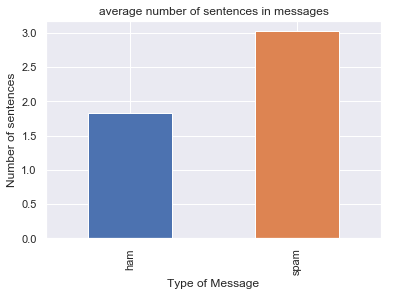

In [35]:
y=data.groupby("type")["sentlen"].mean()
cx=y.plot.bar(title='average number of sentences in messages')
cx.set_xlabel("Type of Message")
cx.set_ylabel("Number of sentences")

Text(0, 0.5, 'Number of words')

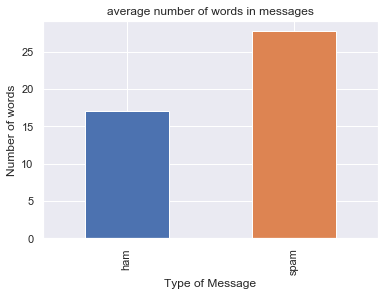

In [36]:
z=data.groupby("type")["wordlen"].mean()
cx=z.plot.bar(title='average number of words in messages')
cx.set_xlabel("Type of Message")
cx.set_ylabel("Number of words")

In [42]:
def avg_word_len(msg):
    s=0
    for word in msg:
        s=s+len(word)
    return s/len(msg)

data["avg_word_len"] = data["words"].apply(lambda x: avg_word_len(x))